### *"The ones who are crazy enough to think they can change the world are the ones who do."*
*-Steve Jobs*

Be the change, folks.  Be the change. You can and you will.

----

### YOUR NAME HERE:  Brandon Rank

#### List the names of anyone you helped here: Luke Faro

#### List the names of anyone who helped you here: Luke Faro, Lucas Acosta-Morales
----

# HW SQL 6: Joins

**Be sure to use your SQL cheat sheet to help you in this homework!**

In this homework, we focus on the JOIN functionality, plus we review some old topics.  To make sure you are understanding when to use the capabilities and when to not, some problems will involve JOINS and some will involve old techniques.  So think hard before assuming you need a join.

Here are the topics that this this HW reviews.
* Basics of an inner join
* Basics of a left/right outer join
* How to alias tables on the left and right of the join statemet
* The need to alias if column is in two tables; So you don’t need alias if column is unique to one table
* CASE WHEN AND THEN


## Now remember:  HAVING is special

Some of these problems will require a GROUP BY call.  Remember that the ```HAVING``` clause in a ```GROUP BY``` statement feels like a ```WHERE``` clause, but there are some important differences:

- HAVING is used when the selection condition is based on aggregate funtion of a column, such as ```COUNT(name) > 10``` or ```MAX(Rain) < 2.0```.
- WHERE is applied BEFORE the groups are made.
- HAVING is applied AFTER the grouping is done.
- HAVING removes groups from the output, whereas WHERE removes rows from the original table before they are grouped.
- So any rows removed by the WHERE clause are removed from the calculcations of the aggregate functions.

## Technicalities to Remember:  

* SQLite can only handle inner joins and left outer joins.  So we will practice these.  Plus, these are the joins used the most in the real world.
* SQLite cannot handle SELECT....INTO so we cannot practice that here.


---

## Create a SQLite database from a csv file

Remember: To use SQLite, we need to import some special packages and to create a database (db) file from a csv file.

### !!!!!!!!!!!!!!!!!!!!!!So please run the cells below!!!!!!!!!!!!!!!!!!!!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3 as sql

Let's bring in the weather data for your first problem.

In [ ]:
#Read in a csv with weather data
weather = pd.read_csv('weather.csv')
conn = sql.connect('weather.db')

try:
    weather.to_sql('weather', conn, index = False)
except ValueError:
    print("""Dr. R Note: A ValueError occurred. That's probably fine and likely just means
           that you've run this cell twice and you're getting an error
           because the DB is already created.  :) """)

The weather table table contains about 62 years worth of temperature, rainfall and sunshine data for the city of London.

There is a record/row for each year/month from Jan 1957 to April 2019.  

* T_high:  The highest temp recorded for the month (celsius)
* T_low:  The lowest temp recorded for the month (celsius)
* Rain: the rainfall is the total amout of rain for the month in millimeters
* Sun : the total number of hours sunshine for the month.

In [ ]:
sql_statement = """SELECT *
                   FROM weather"""

weather_results = pd.read_sql_query(sql_statement, conn)
weather_results

,Year,Month,T_high,T_low,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...
743,2018,12,10.7,5.2,60.6,40.3
744,2019,1,7.6,2.0,33.2,56.4
745,2019,2,12.4,3.3,34.2,120.2
746,2019,3,13.1,5.8,49.6,119.0


### Question 1.

Like us, the summer months in London are June, July, and August.

Find the years where the average T_high during the summer months is greater than the average overall summer T_high across all years.  Also, how the average/Max/Min T_high for these years.

The answer will have 29 rows and is shown below.

| Year | AVG(T_high) | MAX(T_high) | MIN(T_high) |
|:----:|:---------:|:---------:|:---------:|
| 1957 | 22.400000 |    23.6   |    21.1   |
| 1959 | 23.666667 |    24.7   |    22.1   |
| 1970 | 22.400000 |    23.6   |    21.3   |
| 1973 | 22.333333 |    23.7   |    21.4   |
| 1975 | 23.933333 |    25.9   |    21.8   |
| 1976 | 25.733333 |    26.6   |    25.1   |
| 1983 | 24.300000 |    27.6   |    20.8   |
| 1984 | 23.300000 |    24.4   |    21.3   |
| 1989 | 24.033333 |    25.8   |    22.1   |
| 1990 | 23.400000 |    26.0   |    19.5   |
|  ... |    ...    |    ...    |    ...    |
| 2010 | 23.366667 |    25.0   |    21.6   |
| 2013 | 23.866667 |    27.0   |    20.3   |
| 2014 | 23.200000 |    25.8   |    21.7   |
| 2015 | 22.700000 |    23.7   |    22.2   |
| 2016 | 23.133333 |    24.7   |    20.7   |
| 2017 | 23.266667 |    24.0   |    22.0   |
| 2018 | 25.666667 |    28.3   |    24.2   |

In [ ]:
sql_statement1 = """SELECT Year, AVG(T_high), MAX(T_high), MIN(T_high)
                    FROM weather
                    WHERE Month IN (6,7,8)
                    GROUP BY Year
                    HAVING AVG(T_high) > (SELECT AVG(T_high)
                                          FROM weather
                                          WHERE Month IN (6,7,8));"""

weather_results1 = pd.read_sql_query(sql_statement1, conn)
weather_results1

,Year,AVG(T_high),MAX(T_high),MIN(T_high)
0,1957,22.400000,23.6,21.1
1,1959,23.666667,24.7,22.1
2,1970,22.400000,23.6,21.3
3,1973,22.333333,23.7,21.4
4,1975,23.933333,25.9,21.8
5,1976,25.733333,26.6,25.1
6,1983,24.300000,27.6,20.8
7,1984,23.300000,24.4,21.3
8,1989,24.033333,25.8,22.1
9,1990,23.400000,26.0,19.5


### Closing the DB connection.
Let's close the DB connection as we will now work with  a different data set.

In [ ]:
conn.close()

----

### NBA Salaries

First, import the NBA Salaries from the 2015-2016 season for a few more practice problems.

In [ ]:
nba_15_16 = pd.read_csv('nba_salaries.csv') #Open the csv
conn = sql.connect('nba_more.db') #Create an nba_more database

try:
    nba_15_16.to_sql('nba_15_16', conn, index = False) #Dump the csv into a table called nba_15_16 in the nba_more database
except ValueError:
    print("""Dr. R Note: A ValueError occurred. That's probably fine and likely just means
           that you've run this cell twice and you're getting an error
           because the DB is already created.  :) """)


Let's select everything form the table, so you can remember what is in this nba dataset.

In [ ]:
sql_statement = """SELECT *
                   FROM nba_15_16"""

nba_results = pd.read_sql_query(sql_statement, conn)
nba_results

,player,position,team,salary
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


----
### Question 2.

Select all teams where ALL point guards ('PG') made more than 2 million dollars.  There should be no repeats on your final list.

Hints:  

* The answer should be as follows.

|          team          |
|:----------------------:|
|      Chicago Bulls     |
|    Dallas Mavericks    |
|     Denver Nuggets     |
|     Detroit Pistons    |
|  Golden State Warriors |
|     Houston Rockets    |
|   Los Angeles Lakers   |
|  Oklahoma City Thunder |
|   Philadelphia 76ers   |
| Portland Trail Blazers |
|    Sacramento Kings    |
|    Washington Wizard   |

In [ ]:
sql_statement2 = """SELECT DISTINCT(team)
                    FROM nba_15_16
                    WHERE position = 'PG'
                    GROUP BY team
                    HAVING MIN(salary) >2;"""

nba_results2 = pd.read_sql_query(sql_statement2, conn)
nba_results2

,team
0,Chicago Bulls
1,Dallas Mavericks
2,Denver Nuggets
3,Detroit Pistons
4,Golden State Warriors
5,Houston Rockets
6,Los Angeles Lakers
7,Oklahoma City Thunder
8,Philadelphia 76ers
9,Portland Trail Blazers


----
### Question 3.

A) We want to visualize the distribution of salaries for nba players in 2015-16.  Python can help us do that.

* First, create a sql_statement below to select ALL rows from the nba_15_16 table.  The results will be stored into nba_results.

* Then replace the string starting with "REPLACE ... " to create a histogram for the salary data.

Text(0.5, 0, 'Salaries In Millions')

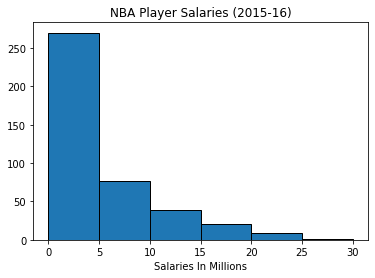

In [ ]:
sql_statement3A = """SELECT *
                     FROM nba_15_16"""

nba_results3A = pd.read_sql_query(sql_statement3A, conn)

plt.hist(nba_results3A["salary"], bins = np.arange(0,35,5), ec='black')
plt.title("NBA Player Salaries (2015-16)")
plt.xlabel("Salaries In Millions")

B) Based on the histogram above, we will make these salary designations.

* \[0, 5 million) - low
* \[5 million, 10 million) - medium
* \[10 million, 15 million) - high
* At lesat 15 million - super star


Generate this table exactly, which shows how  many players are in each category.

|   | salary_category | num_players |
|--:|----------------:|------------:|
| 0 | high            | 39          |
| 1 | low             | 270         |
| 2 | medium          | 77          |
| 3 | super star      | 31          |



HINT:  You'll need CASE-WHEN

In [ ]:
sql_statement3B = """SELECT CASE WHEN salary > 15 THEN 'super star'
                                 WHEN salary >= 10 AND salary <15 THEN 'high'
                                 WHEN salary >= 5 AND salary < 10 THEN 'medium'
                                 ELSE 'low' END
                                 AS salary_category,
                            COUNT(player) AS num_players
                      FROM nba_15_16
                      GROUP BY salary_category"""

nba_results3B = pd.read_sql_query(sql_statement3B, conn)
nba_results3B

,salary_category,num_players
0,high,39
1,low,270
2,medium,77
3,super star,31


---
Now, for the first time ever in a Jupyter notebook file, we will load in a second csv and store it as a second table in the SAME database.

This second csv/table has some stats on the 20-21 NBA players.

Run the cell below to make this happen.

In [ ]:
nba_20_21= pd.read_csv('nba_20-21.csv')   #Open the csv

try:
    nba_20_21.to_sql('nba_20_21', conn, index = False)    #Dump it into a table called nba_20_21
                                                          #in the nba_more database
except ValueError:
    print("""Dr. R Note: A ValueError occurred. That's probably fine and likely just means
           that you've run this cell twice and you're getting an error
           because the DB is already created.  :) """)


If you run the cell below, you can see that our nba.db file contains two tables, so either ```nba_15_16``` or ```nba_20_21```.   

In [ ]:
#See all the tables included
curs = conn.cursor()
curs.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()

[('nba_15_16',), ('nba_20_21',)]

### NOTE:  

The ```FROM``` clause in all your select statements must involve one of the 2 above table names, ie, one of ```nba_15_16``` and ```nba_20_21```.   

The data from the 20-21 table came from https://basketball.realgm.com/nba/players.  It does not include salary information but it has the following.

* jersey number
* name of player
* position of player
* height
* weight
* yos - Years playing in the NBA
* predraft_team - team they were in before the draft

Let's select everything from the second table, just so that you can get a visual.  Run the cell below.

In [ ]:
sql_statement = """SELECT *
                   FROM nba_20_21"""

nba_results = pd.read_sql_query(sql_statement, conn)
nba_results

,jersey,name,pos,height,weight,age,team,yos,predraft_team,draft_status,nationality
0,15,Precious Achiuwa,SF,81,210,21,Miami Heat,0,Memphis,2020 Rnd 1 Pick 20,Nigeria
1,12,Steven Adams,C,84,265,27,New Orleans Pelicans,7,Pittsburgh,2013 Rnd 1 Pick 12,New Zealand
2,13,Bam Adebayo,C,73,255,23,Miami Heat,3,Kentucky,2017 Rnd 1 Pick 14,United States
3,0,Ty-Shon Alexander,SG,76,195,23,Phoenix Suns,0,Creighton,"2020 NBA Draft, Undrafted",United States
4,6,Nickeil Alexander-Walker,SG,77,205,22,New Orleans Pelicans,1,Virginia Tech,2019 Rnd 1 Pick 17,Canada
...,...,...,...,...,...,...,...,...,...,...,...
490,55,Delon Wright,G,77,185,29,Sacramento Kings,5,Utah,2015 Rnd 1 Pick 20,United States
491,21,Thaddeus Young,F,80,235,32,Chicago Bulls,13,Georgia Tech,2007 Rnd 1 Pick 12,United States
492,11,Trae Young,PG,73,180,22,Atlanta Hawks,2,Oklahoma,2018 Rnd 1 Pick 5,United States
493,40,Cody Zeller,F,84,240,28,Charlotte Hornets,7,Indiana,2013 Rnd 1 Pick 4,United States


----

### Question 4.

Find how many players were on each team in the 2015-2016 season and also show the average salary of each team.  Order the table from the team with the greatest number of players to the least.  Make the column headers match those below.

HINT: You'll get  a 30 by 3 table and the partial answer is shown below.

|                team | num_players | avg_salary |
|--------------------:|------------:|-----------:|
|   Memphis Grizzlies |          21 |   4.466497 |
|   Charlotte Hornets |          18 |   4.672355 |
|  Washington Wizards |          17 |   5.296912 |
|           Utah Jazz |          17 |   3.095993 |
|     Toronto Raptors |          17 |   4.392507 |
|        Phoenix Suns |          17 |   2.971813 |
|                 ... |         ... |        ... |
|  Los Angeles Lakers |          11 |   6.237086 |
|    Dallas Mavericks |          11 |   5.978414 |
|     Detroit Pistons |          10 |   4.221176 |
| Cleveland Cavaliers |          10 |  10.231241 |


In [ ]:
sql_statement4 = """SELECT team, COUNT(player) AS num_players, AVG(salary) AS avg_salary
                    FROM nba_15_16
                    GROUP BY team
                    ORDER BY num_players DESC;"""

nba_results4 = pd.read_sql_query(sql_statement4, conn)
nba_results4


,team,num_players,avg_salary
0,Memphis Grizzlies,21,4.466497
1,Charlotte Hornets,18,4.672355
2,Phoenix Suns,17,2.971813
3,Toronto Raptors,17,4.392507
4,Utah Jazz,17,3.095993
5,Washington Wizards,17,5.296912
6,New Orleans Pelicans,16,5.032163
7,Oklahoma City Thunder,16,6.052010
8,Boston Celtics,15,3.352367
9,Atlanta Hawks,14,4.969507


----

### Question 5.


A) For each team 2015-2016, show how many players per position there were and the average salary per position.  The column titles should be shown as follows. Sort the table from the highest average salary to the least.

| position | num_players | avg_salary |
|---------:|------------:|-----------:|

HINT: You'll get  a 5 by 3 table where there are 96 shooting guards who made an average of \$3.988195 million.



In [ ]:
sql_statement5 = """SELECT position, COUNT(player) AS num_players, AVG(salary) AS avg_salary
                    FROM nba_15_16
                    GROUP BY position
                    ORDER BY avg_salary DESC;"""

nba_results5 = pd.read_sql_query(sql_statement5, conn)
nba_results5


,position,num_players,avg_salary
0,C,69,6.082913
1,SF,82,5.532675
2,PG,85,5.165487
3,PF,85,4.951344
4,SG,96,3.988195


B) Based on your analysis, what position makes the most on avereage?

The position that makes the most on average is the center position. For the data from the 15-16 season, the 69 players who were centers had an average salary of 6.08 million with the second highest average earning per position being those who are small forwards earning an avg of 5.53 million.

---

### Question 6.

a) ***Using joins***, show how many players from the 2015-2016 season also played in 2021-21 season.

Hint:  The answer is between 155 and 165.

In [ ]:
sql_statement6 = """SELECT COUNT(player)
                    FROM nba_15_16
                        INNER JOIN nba_20_21
                        ON player = name;"""

nba_results6 = pd.read_sql_query(sql_statement6, conn)
nba_results6

,COUNT(player)
0,158


b) ***Now use another method instead of joins*** to show how many players from the 2015-2016 season also played in 2021-21 season.

In [ ]:
sql_statement6b = """SELECT COUNT(player)
                     FROM nba_15_16,nba_20_21
                     WHERE nba_15_16.player = nba_20_21.name"""

nba_results6b = pd.read_sql_query(sql_statement6b, conn)
nba_results6b

,COUNT(player)
0,158


### Question 7.

***Using joins***, for each player in the 2015-2016 season, show the player's team in 2015-2016 and the player's team in 2020-2021.  Those players who were not in the NBA in the 2020-2021 season should be included.  Sort by player name and rename the columns so that they look like below.

You'll have 417 rows, since the length fo the 2015-2016 roster is 417.

|          player |          team15_16 |             team20_21 |
|----------------:|-------------------:|----------------------:|
|    Paul Millsap |      Atlanta Hawks |        Denver Nuggets |
|      Al Horford |      Atlanta Hawks | Oklahoma City Thunder |
|  Tiago Splitter |      Atlanta Hawks |                  None |
|     Jeff Teague |      Atlanta Hawks |       Milwaukee Bucks |
|     Kyle Korver |      Atlanta Hawks |                  None |
|             ... |                ... |                   ... |
|       Gary Neal | Washington Wizards |                  None |
|    DeJuan Blair | Washington Wizards |                  None |
| Kelly Oubre Jr. | Washington Wizards |                  None |
|  Garrett Temple | Washington Wizards |         Chicago Bulls |
|    Jarell Eddie | Washington Wizards |                  None |


In [ ]:
sql_statement7a = """SELECT player, nba_15_16.team AS team15_16, nba_20_21.team AS team20_21
                     FROM nba_15_16
                          LEFT JOIN nba_20_21
                          ON player = name
                     ORDER BY team15_16"""

nba_results7a = pd.read_sql_query(sql_statement7a, conn)
nba_results7a


,player,team15_16,team20_21
0,Paul Millsap,Atlanta Hawks,Denver Nuggets
1,Al Horford,Atlanta Hawks,Oklahoma City Thunder
2,Tiago Splitter,Atlanta Hawks,None
3,Jeff Teague,Atlanta Hawks,Milwaukee Bucks
4,Kyle Korver,Atlanta Hawks,None
...,...,...,...
412,Gary Neal,Washington Wizards,None
413,DeJuan Blair,Washington Wizards,None
414,Kelly Oubre Jr.,Washington Wizards,None
415,Garrett Temple,Washington Wizards,Chicago Bulls


### Question 8.

Modify the query above so that the resulting table shows only those players who are not on the 2020-2021 roster.  ***Use the NULL keyword to do this.***

HINT:  There are 417 folks on the 2015-2016 roster and you know how many of them played in the 20-21 season from a previous question.  So how many rows should be in this table?

|      player     |      team15_16     | team20_21 |
|:---------------:|:------------------:|:---------:|
|  Tiago Splitter |    Atlanta Hawks   |    None   |
|   Kyle Korver   |    Atlanta Hawks   |    None   |
|       ...       |         ...        |    ...    |
| Kelly Oubre Jr. | Washington Wizards |    None   |
|   Jarell Eddie  | Washington Wizards |    None   |


In [ ]:
sql_statement8 = """SELECT player, nba_15_16.team AS team15_16, nba_20_21.team AS team20_21
                     FROM nba_15_16
                        LEFT JOIN nba_20_21
                        ON player = name
                     WHERE team20_21 IS NULL
                     ORDER BY team15_16"""

nba_results8 = pd.read_sql_query(sql_statement8, conn)
nba_results8


,player,team15_16,team20_21
0,Tiago Splitter,Atlanta Hawks,None
1,Kyle Korver,Atlanta Hawks,None
2,Thabo Sefolosha,Atlanta Hawks,None
3,Walter Tavares,Atlanta Hawks,None
4,Jason Richardson,Atlanta Hawks,None
...,...,...,...
254,Ramon Sessions,Washington Wizards,None
255,Gary Neal,Washington Wizards,None
256,DeJuan Blair,Washington Wizards,None
257,Kelly Oubre Jr.,Washington Wizards,None


### Question 9.

Using joins, show any players from the 2015-2016 season who are still playing but on a different team in 20-21. Be sure to show the player and both teams, renaming your columns as below.

The answer is shown below.

|     |      player     |      team15_16     |       team20_21       |
|:---:|:---------------:|:------------------:|:---------------------:|
|  0  |   Paul Millsap  |    Atlanta Hawks   |     Denver Nuggets    |
|  1  |    Al Horford   |    Atlanta Hawks   | Oklahoma City Thunder |
|  2  |   Jeff Teague   |    Atlanta Hawks   |    Milwaukee Bucks    |
|  3  |    Mike Scott   |    Atlanta Hawks   |  Philadelphia Sixers  |
|  4  |  Kent Bazemore  |    Atlanta Hawks   | Golden State Warriors |
| ... |       ...       |         ...        |          ...          |
| 129 |   Rodney Hood   |      Utah Jazz     |    Toronto Raptors    |
| 130 |    John Wall    | Washington Wizards |    Houston Rockets    |
| 131 | Markieff Morris | Washington Wizards |   Los Angeles Lakers  |
| 132 |   Jared Dudley  | Washington Wizards |   Los Angeles Lakers  |
| 133 |  Garrett Temple | Washington Wizards |     Chicago Bulls     |

In [ ]:
sql_statement9 = """SELECT player, nba_15_16.team AS team15_16, nba_20_21.team AS team20_21
                    FROM nba_15_16
                         INNER JOIN nba_20_21
                         ON player = nba_20_21.name
                    WHERE team15_16 != team20_21
                    ORDER BY team15_16"""

nba_results9 = pd.read_sql_query(sql_statement9, conn)
nba_results9


,player,team15_16,team20_21
0,Paul Millsap,Atlanta Hawks,Denver Nuggets
1,Al Horford,Atlanta Hawks,Oklahoma City Thunder
2,Jeff Teague,Atlanta Hawks,Milwaukee Bucks
3,Mike Scott,Atlanta Hawks,Philadelphia Sixers
4,Kent Bazemore,Atlanta Hawks,Golden State Warriors
...,...,...,...
129,Rodney Hood,Utah Jazz,Toronto Raptors
130,John Wall,Washington Wizards,Houston Rockets
131,Markieff Morris,Washington Wizards,Los Angeles Lakers
132,Jared Dudley,Washington Wizards,Los Angeles Lakers


### Question 10.

Using joins, ***for each team***, show how many players from the 2015-2016 season also played in 2021-21 season.  Also show the average age and  average 15-16 salary of these players.  Sort by team name ascending and rename the columns so that they look like below.

You'll get 30 rows for the 30 teams.

|                team | num_in_both |   avg_age | avg_salary |
|--------------------:|------------:|----------:|-----------:|
|       Atlanta Hawks |           7 | 31.571429 |   6.724702 |
|      Boston Celtics |           5 | 28.800000 |   4.389403 |
|       Brooklyn Nets |           4 | 30.750000 |   4.374236 |
|   Charlotte Hornets |           4 | 29.500000 |   8.090966 |
|       Chicago Bulls |           6 | 29.833333 |   7.137244 |
| Cleveland Cavaliers |           4 | 31.750000 |   18.33196 |
| ...                 | ...         | ...       | ...        |


In [ ]:
sql_statement10 = """SELECT nba_15_16.team, COUNT(player) AS num_in_both, AVG(age) AS avg_age, AVG(salary) AS avg_salary
                     FROM nba_15_16
                          INNER JOIN nba_20_21
                          ON player = name
                     GROUP BY nba_15_16.team
                     ORDER BY nba_15_16.team ASC"""

nba_results10 = pd.read_sql_query(sql_statement10, conn)
nba_results10


,team,num_in_both,avg_age,avg_salary
0,Atlanta Hawks,7,31.571429,6.724702
1,Boston Celtics,5,28.800000,4.389403
2,Brooklyn Nets,4,30.750000,4.374236
3,Charlotte Hornets,4,29.500000,8.090966
4,Chicago Bulls,6,29.833333,7.137244
5,Cleveland Cavaliers,4,31.750000,18.331968
6,Dallas Mavericks,1,33.000000,1.270964
7,Denver Nuggets,5,28.000000,4.451963
8,Detroit Pistons,6,29.000000,5.111883
9,Golden State Warriors,6,30.833333,9.641412


### Question 11

Show the name of the players in the 20-21 season, their current team, and the 2015-2016 team.

If they don't have a 2015-2016 team, show the phrase "NEW".  How can you do this?

* Do this using the COALESCE function which helps us replace NULL values with other values.
* We have not discussed COALESCE in class, but if you wish to be a SQL Programmer, you have to be able to learn by example.  So check out this site: [Click here to read about COALESCE](https://www.sqlitetutorial.net/sqlite-functions/sqlite-coalesce/)

The answer is shown.

|     |           name           |       team20_21      |       team15_16       |
|:---:|:------------------------:|:--------------------:|:---------------------:|
|  0  |     Precious Achiuwa     |      Miami Heat      |          NEW          |
|  1  |       Steven Adams       | New Orleans Pelicans | Oklahoma City Thunder |
|  2  |        Bam Adebayo       |      Miami Heat      |          NEW          |
|  3  |     Ty-Shon Alexander    |     Phoenix Suns     |          NEW          |
|  4  | Nickeil Alexander-Walker | New Orleans Pelicans |          NEW          |
| ... |            ...           |          ...         |          ...          |
| 490 |       Delon Wright       |   Sacramento Kings   |    Toronto Raptors    |
| 491 |      Thaddeus Young      |     Chicago Bulls    |     Brooklyn Nets     |
| 492 |        Trae Young        |     Atlanta Hawks    |          NEW          |
| 493 |        Cody Zeller       |   Charlotte Hornets  |   Charlotte Hornets   |
| 494 |        Ivica Zubac       | Los Angeles Clippers |          NEW          |

In [ ]:
sql_statement11 = """SELECT name, nba_20_21.team AS team20_21, COALESCE(nba_15_16.team, 'NEW') AS team15_16
                     FROM nba_20_21
                          LEFT JOIN nba_15_16
                          ON player = name"""

nba_results11 = pd.read_sql_query(sql_statement11, conn)
nba_results11


,name,team20_21,team15_16
0,Precious Achiuwa,Miami Heat,NEW
1,Steven Adams,New Orleans Pelicans,Oklahoma City Thunder
2,Bam Adebayo,Miami Heat,NEW
3,Ty-Shon Alexander,Phoenix Suns,NEW
4,Nickeil Alexander-Walker,New Orleans Pelicans,NEW
...,...,...,...
490,Delon Wright,Sacramento Kings,Toronto Raptors
491,Thaddeus Young,Chicago Bulls,Brooklyn Nets
492,Trae Young,Atlanta Hawks,NEW
493,Cody Zeller,Charlotte Hornets,Charlotte Hornets


----

### Question 12.

A) For the players in 20-21, show the average weight and the min/max/average height per position.  Sort the table by the average height from high to low.  Rename your columns to have nicely formatted headers that explain what data is in the column.

There should be 9 rows.

In [ ]:
sql_statement12 = """SELECT pos, AVG(weight) AS avg_weight, MIN(height) AS min_weight, MAX(height) AS max_weight, AVG(height) AS avg_height
                     FROM nba_20_21
                     GROUP BY pos
                     ORDER BY avg_height DESC"""

nba_results12 = pd.read_sql_query(sql_statement12, conn)
nba_results12


,pos,avg_weight,min_weight,max_weight,avg_height
0,C,250.769231,73,89,79.596154
1,F,223.911765,73,85,79.323529
2,GF,209.769231,75,81,78.307692
3,SF,218.835616,73,84,78.232877
4,FC,248.428571,73,87,77.000000
5,PF,233.909091,73,84,77.000000
6,SG,202.772152,61,81,76.810127
7,G,197.811594,72,81,75.840580
8,PG,190.344262,61,79,73.721311


B) Does it appear that there is a significant difference between the height and weight of any of the positions?  Explain.

It appears that there is a very large variance in the average weights for positions that have similar average heights. For example, the C and F positions have avg_heights that are only 0.2 off of each other, however, their avg_weights differ by nearly 27 lbs. Similarly, the GF and SF positions have avg_heights of 78.3 and 78.23 respectively, but their avg_weights differ by roughly 7 lbs. This trend continues with the FC, PF and SG positions, who have avg_heights of 77.0, 77.0 and 76.8 respectively, but have a range of avg_weights from 202.7 to 248.2 lbs. From this, we see that there is significant differences in the avg_weights on the positions that have similar avg_heights.

----
Let's close the datbase connection to the nba.

In [ ]:
conn.close()

----

### HEARTS ON FIRE

You remember the HOF DB.  Let's reload it.

In [ ]:
#Set up the DB

hearts_on_fire = pd.read_csv('HoF_2020_2021.csv')
conn = sql.connect('hearts_on_fire.db')

try:
    hearts_on_fire.to_sql('hearts_on_fire', conn, index = False)
except ValueError:
    print("""Dr. R Note: A ValueError occurred. That's probably fine and likely just means
           that you've run this cell twice and you're getting an error
           because the DB is already created.  :) """)

Now let's recall what is in the table by running the following cell.

In [ ]:
sql_statement = """SELECT *
                   FROM hearts_on_fire"""

hof_results = pd.read_sql_query(sql_statement, conn)
hof_results

,donation,state,affiliation,class_year,preferred_division,date_submitted,donation_year
0,50.0,CA,Alumni,1997.0,Performing Arts,1/29/2020 10:57,2020
1,37.0,PA,Student,2020.0,Business,2/12/2020 21:31,2020
2,25.0,PA,Alumni,NaN,None,2/10/2020 15:10,2020
3,10.0,PA,Student,2022.0,Science/Math,2/12/2020 17:53,2020
4,50.0,PA,Family,NaN,None,2/12/2020 15:47,2020
...,...,...,...,...,...,...,...
1779,100.0,NY,Alumni,2019.0,Liberal Arts/Social,2/8/2021 11:53,2021
1780,20.0,FL,Family,2023.0,None,2/9/2021 11:44,2021
1781,100.0,WV,Alumni,1970.0,Science/Math,2/10/2021 15:01,2021
1782,250.0,DE,Alumni,2007.0,Liberal Arts/Social,2/10/2021 18:23,2021


### Question 13.

You saw a variant of this problem before.  

Write a SINGLE query that tells us the number of contributors came from each of these 4 regions of the US.  

Recall that the US Census lists the following as the 4 main regions of the US.  

* Northeast Region
  * CT, ME, MA, NH, RI, VT, NJ, NY, PA
* Midwest Region
  * IL, IN, MI, OH, WI, IA, KS, MN, MO, NE, ND, SD
* South Region
  * DE, DC, FL, GA, MD, NC, SC, VA, WV, AL, KY, MS, TN, AR, LA, OK, TX
* West Region
  * AZ, CO, ID, MT, NV, NM, UT, WY, AK, CA, HI, OR, WA

In [ ]:
sql_statement13 = """SELECT CASE WHEN state IN ('CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA') THEN 'Northeast'
                                 WHEN state IN ('IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD') THEN 'Midwest'
                                 WHEN state IN ('DE', 'DC', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX') THEN 'South'
                                 WHEN state IN ('AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA') THEN 'West'
                                 END AS region,
                            COUNT(state) AS num_contributors
                      FROM hearts_on_fire
                      WHERE state IS NOT NULL
                      GROUP BY region
"""

hof_results13 = pd.read_sql_query(sql_statement13, conn)
hof_results13

,region,num_contributors
0,Midwest,35
1,Northeast,1530
2,South,161
3,West,55


----
Let's close the datbase connection to the hearts on fire database.

In [ ]:
conn.close()

### Question 14.

Did you follow the conventions expected?  For this question I will give/takeaway points for doing so.

---
You're done!